In [3]:
%matplotlib inline

# Exercise 2

### 1)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

0.0


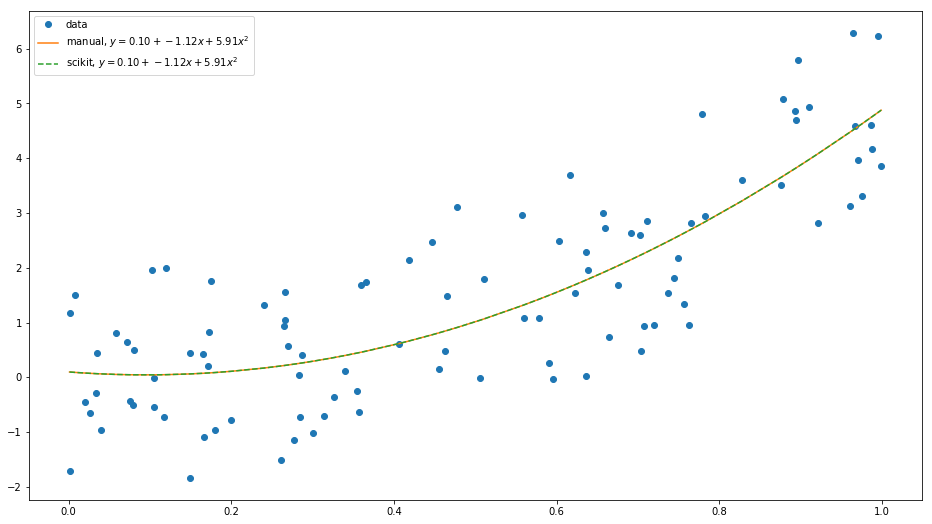

In [76]:
## 1)
N = 100
x = np.random.random(N)
x = np.sort(x)
noise = 2

def func(x):
    return 5*x**2

X = np.array([x**i for i in range(3)]).T

y = func(x) + noise*np.random.uniform(low=-1, high = 1, size=N)

def get_yhat(X,y):
    symX = X.T @ X  # matrix product
    beta = linalg.inv(symX) @ X.T @ y
    yhat = X @ beta
    return yhat, beta

yhat,beta = get_yhat(X,y)

plt.figure(figsize = [16,9])
plt.plot(x,y, 'o', label = 'data')
plt.plot(x,yhat,   label = 'manual, $y={:.2f} + {:.2f}x + {:.2f}x^2$'.format(*beta))

## 2)
from sklearn.linear_model import LinearRegression 
linreg = LinearRegression(fit_intercept=False)
a = linreg.fit(X,y)
beta_sk = a.coef_
print(a.intercept_)
yhat_sk = linreg.predict(X)

plt.plot(x,yhat_sk,   '--',label = 'scikit, $y={:.2f} + {:.2f}x + {:.2f}x^2$'.format(*beta_sk))
plt.legend()

### 3)

In [81]:
def squared_error(y,yhat):
    n = y.size
    if n != yhat.size:
        raise ValueError('vectors must be same size')
    return 1/n*np.sum((y-yhat)**2)

def R2score(y,yhat):
    n = y.size
    
    if n != yhat.size:
        raise ValueError('vectors must be same size')
        
    ymean = np.mean(y)
    return 1 - (np.sum((y-yhat)**2)/np.sum((y-ymean)**2))

# yhat.shape, y.shape
print('manual')
print('MSE : {:.3f}\nR^2 : {:.3f}'.format(squared_error(y,yhat), R2score(y,yhat)))

from sklearn.metrics import mean_squared_error
print('scikit')
print('MSE : {:.3f}\nR^2 : {:.3f}'.format(mean_squared_error(y,yhat),linreg.score(X,y)))


manual
MSE : 1.172
R^2 : 0.665
scikit
MSE : 1.172
R^2 : 0.665


In [68]:
X.shape

(100, 3)

0.674236538716247

# Exercise 3